# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm
from pandas import pivot_table
from pylab import *

%matplotlib inline

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('./Employee.csv')
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer here-1st ways
table = pivot_table(employee, index=['Department'], aggfunc={'Salary':np.mean})
table

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# your answer here-2nd way
table = employee.groupby(by='Department').agg({'Salary':'mean'})
table.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
table = pivot_table(employee, index=['Department','Title'], aggfunc=np.mean)
table.head()


Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
table = pivot_table(employee, index=['Title','Years'], aggfunc=np.mean)
table

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
# your answer here
table = pivot_table(employee, values=['Salary','Name'], index=['Department','Title'], aggfunc={'Salary': np.mean, 'Name': len})
table


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
# your answer here
table = pivot_table(employee, values=['Salary'], index=['Department','Title'], aggfunc={'Salary': [np.median,min,max,np.std]})
table

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here

#fill NaN values with 0 because all NaN are due to the Std deviation of only one element does not make sense
table = pivot_table(employee, values=['Salary'], index=['Department','Title'], aggfunc={'Salary': [np.median,min,max,np.std]},fill_value="0")
table

Salary                      
                        max median   min      std
Department Title                                 
HR         VP          70.0   70.0  70.0        0
           analyst     35.0   32.5  30.0  3.53553
IT         VP          70.0   70.0  70.0        0
           analyst     35.0   32.5  30.0  3.53553
           associate   60.0   60.0  60.0        0
Sales      associate   55.0   55.0  55.0        0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
table = pivot_table(employee, values=['Salary','Name'], index=['Department'], aggfunc={'Salary': sum, 'Name': len})
table

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
# your answer here
table = pivot_table(employee, values=['Years','Salary'], index=['Department','Title'], aggfunc={'Salary': np.mean, 'Years': len})
table

Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
max_salaries = employee.groupby(by='Department').agg({'Salary':'max'})
sum_of_salaries = employee.groupby(by='Department').agg({'Salary':'sum'})

salary = sum_of_salaries - max_salaries
personel = employee.groupby(by='Department').agg({'Name': lambda x : np.sum(pd.value_counts(x))})

#check in case there were more than one person in the department
if personel.Name[personel.Name <= 1] is not False:
    personel.Name = personel.Name -1
else:
    print("It can not be performed the calculation")

In [13]:
# your answer here
print(salary.Salary/personel.Name)

Department
HR       32.500000
IT       41.666667
Sales    55.000000
dtype: float64


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
# your answer here
fitbit = pd.read_csv('./Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [15]:
fitbit[['Minutes Sedentary']].max(axis=0)

Minutes Sedentary    998.0
dtype: float64

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [16]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [17]:
# your answer here
import pprint
from pprint import pprint

print(fitbit.columns)
print("\n")
print(fitbit.dtypes)

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
# your answer here
correlation = fitbit['Steps'].corr(fitbit['Minutes Very Active'])
if correlation > 0.9:
    print("There is a high correlation between both variables")
else:
    print("There is a poor corelation betwen both variables")
print("Correlation: ",correlation)

There is a poor corelation betwen both variables
Correlation:  0.5714518481062608


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

"\nactivity_table.iplot(kind='hist', \n    x=activity_table['Minutes Very Active'],\n    y=activity_table['Steps'],\n    xTitle='Activity', \n    yTitle='Number of Steps', \n    title='Affectation in Steps by Activity')\n\n"

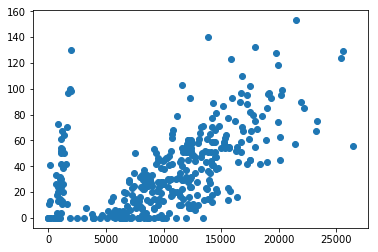

In [19]:
# your answer here
import plotly.plotly as py
import cufflinks as cf
import pandas as pd

cf.go_offline()
activity_table = fitbit[['Steps','Minutes Very Active']]

plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])


"""
activity_table.iplot(kind='hist', 
    x=activity_table['Minutes Very Active'],
    y=activity_table['Steps'],
    xTitle='Activity', 
    yTitle='Number of Steps', 
    title='Affectation in Steps by Activity')

"""


In [20]:
activity_table.scatter_matrix(filename='cufflinks/scatter-matrix', world_readable=True)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [21]:
# your comment here
#Despite there is low correlation between number of steps and the time of activity, it seems actually that both are 
#connected.  
#In my opinion, there are two grafics into the plot.  I guess that from 0 to 2000 steps, the points are due to an
#short walk, and the other plot, from 2000 steps ahead, shows a real training where the steps increase with the time

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
# your answer here
correlation = fitbit['Steps'].corr(fitbit['Minutes Sedentary'])
if correlation > 0.9:
    print("There is a high correlation between both variables. Correlation is", correlation)
else:
    print("There is a poor corelation betwen both variables. Correlation is", correlation)


There is a poor corelation betwen both variables. Correlation is 0.07690608062990091


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

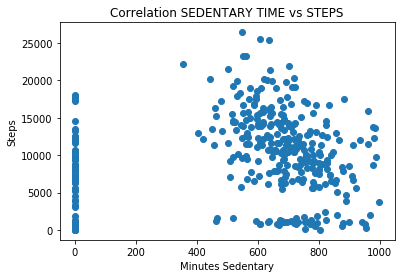

In [23]:
# your answer here

figure()
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])

xlabel('Minutes Sedentary')
ylabel('Steps')

title('Correlation SEDENTARY TIME vs STEPS')

show()


In [24]:
# Your comment here

#I notice an important dispersion an no correlation, so even that in a first sight there could seem to be a direct 
#correlation, there is no connection.
#Also I notice 3 groups of data. 
#First is an error of adquisition people that wear the smartband only for training, so there is no resting time.
#Second group is composed of people with a lot of sedentary time a no steps that are lazy. 
#Finally, there is a group with dispersed values and a little negative correlation, this is composed of people that 
#make exercice but rest too. With less rest time, they make more steps.  This relation, clearly, is the expected
#connection indeed.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
correlation = fitbit['Steps'].corr(fitbit['MinutesOfSleep'])
if correlation > 0.9:
    print("There is a high correlation between both variables. Correlation is", correlation)
else:
    print("There is a poor corelation betwen both variables. Correlation is", correlation)

There is a poor corelation betwen both variables. Correlation is 0.1309856595083638


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

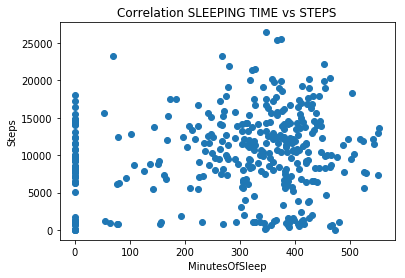

In [26]:
# your answer here
figure()
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])

xlabel('MinutesOfSleep')
ylabel('Steps')

title('Correlation SLEEPING TIME vs STEPS')

show()

In [27]:
# Your comment here

#I notice a group that only use the smartband for trainning but no for sleep.
#There is another group that only use the smartband for monitoring the sleep time, since there are no steps.
#An a group, with very dispersed values, that use the smartband for trainning so much as to sleep.  In this last ç
#group I can match any type of correlation in a first sight

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [28]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit = cor_fit.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


## Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [29]:
# your answer here
cor_fit.sort_values(by=['Steps'],ascending=False)[1:8] #eliminate the first row, step correlation itself

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [39]:
# your answer here
time_grades = pd.read_csv('./Time_Grades.csv')

In [40]:
#Print time_grades
time_grades.head(10)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

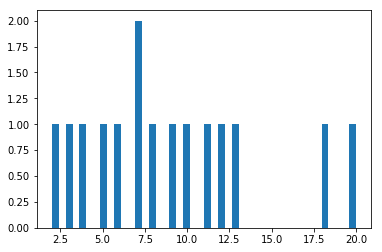

In [66]:
# your answer here
cf.go_offline()

freq_table = time_grades[['Study time','Grade']]

plt.hist(freq_table['Study time'],bins=44)
plt.show()

In [68]:
f.go_offline()

freq_table = time_grades[['Study time','Grade']]

plt.hist(freq_table[['Study time','Grade']],bins=44)
plt.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'go_offline'

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [71]:
# your answer here-Pearson 
pearson_corr = time_grades.corr(method='pearson')
pearson_corr

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [72]:
## your answer here-Spearman
pearson_corr = time_grades.corr(method='spearman')
pearson_corr

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

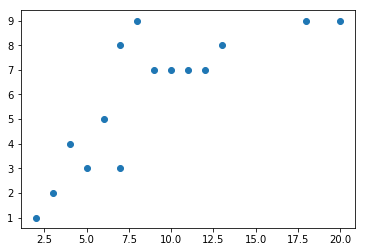

In [76]:
# your answer here
cf.go_offline()
freq_table = time_grades[['Study time','Grade']]

plt.scatter(x=freq_table['Study time'], y=freq_table['Grade'])

plt.show()

In [36]:
#your comment here

#Point with the highest quantity of time spent studing are in 9 grade, followed 8 and 7 grade.  
#It is also signficant that the the 7 grade use to spend quite high values frequently

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [37]:
#your comment here